<a href="https://colab.research.google.com/github/FrancLis/Multivariate-Time-Series-Forecasting/blob/main/3_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Analysis

A linear regression analysis has been tried to observe the behaviour of the data

In [1]:
%matplotlib inline
import sys
import statsmodels
import seaborn as sns
import pandas as pd
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
import matplotlib.pyplot as plt
import sklearn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('seaborn')

In [3]:
file = r"/content/PG.csv"
df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,1.710938,1.722656,1.708984,1.718750,0.399508,832000
1970-01-05,1.718750,1.730469,1.708984,1.726563,0.401324,518400
1970-01-06,1.722656,1.722656,1.707031,1.718750,0.399508,480000
1970-01-07,1.722656,1.750000,1.722656,1.746094,0.405864,710400
1970-01-08,1.746094,1.773438,1.742188,1.765625,0.410404,531200
...,...,...,...,...,...,...
2022-02-03,161.979996,164.979996,161.619995,164.139999,164.139999,10474500
2022-02-04,163.130005,164.490005,161.410004,161.529999,161.529999,8959900
2022-02-07,161.869995,162.259995,159.669998,160.320007,160.320007,6430500


In [4]:
df = df.rename(columns={"Adj Close": "AdjClose"})

In [5]:
df['Close_shifted'] = df['Close'].shift(periods=1)
df = df.dropna()
df

,Open,High,Low,Close,AdjClose,Volume,Close_shifted
Date,,,,,,,
1970-01-05,1.718750,1.730469,1.708984,1.726563,0.401324,518400,1.718750
1970-01-06,1.722656,1.722656,1.707031,1.718750,0.399508,480000,1.726563
1970-01-07,1.722656,1.750000,1.722656,1.746094,0.405864,710400,1.718750
1970-01-08,1.746094,1.773438,1.742188,1.765625,0.410404,531200,1.746094
1970-01-09,1.765625,1.765625,1.753906,1.761719,0.409496,262400,1.765625
...,...,...,...,...,...,...,...
2022-02-03,161.979996,164.979996,161.619995,164.139999,164.139999,10474500,162.600006
2022-02-04,163.130005,164.490005,161.410004,161.529999,161.529999,8959900,164.139999
2022-02-07,161.869995,162.259995,159.669998,160.320007,160.320007,6430500,161.529999


In [6]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
df_transformed = pt.fit_transform(df)

In [7]:
df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=[['Open','High','Low','Close','AdjClose','Volume', 'Close_shifted']])

In [8]:
df_transformed

,Open,High,Low,Close,AdjClose,Volume,Close_shifted
Date,,,,,,,
1970-01-05,-1.478813,-1.479292,-1.477902,-1.476151,-1.535179,-1.705593,-1.478591
1970-01-06,-1.477516,-1.481872,-1.478557,-1.478741,-1.537210,-1.749494,-1.476001
1970-01-07,-1.477516,-1.472889,-1.473339,-1.469724,-1.530138,-1.515211,-1.478591
1970-01-08,-1.469790,-1.465292,-1.466877,-1.463362,-1.525150,-1.691472,-1.469573
1970-01-09,-1.463424,-1.467814,-1.463031,-1.464629,-1.526143,-2.061789,-1.463209
...,...,...,...,...,...,...,...
2022-02-03,1.713991,1.723623,1.717458,1.724784,1.755645,1.070828,1.716941
2022-02-04,1.720021,1.721081,1.716352,1.711116,1.745069,0.858989,1.724981
2022-02-07,1.713412,1.709428,1.707139,1.704712,1.740111,0.439885,1.711314


# OLS



**OLS** is a common technique used in analyzing linear regression. In brief, it compares the difference between individual points in your data set and the predicted best fit line to measure the amount of error produced. The smf.ols() function requires two inputs, the formula for producing the best fit line, and the dataset.The formula is provided as a string, in the following form:

***‘dependent variable ~ list of independent variables separated by the + symbol’*** 

In plain terms, the dependent variable is the factor you are trying to predict, and on the other side of the formula are the variables you are using to predict.

In [10]:
mod = smf.ols("Close_shifted ~ Open + High + Low	+ Close + AdjClose + Volume", data=df_transformed)
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Close_shifted   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.865e+07
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:06:24   Log-Likelihood:                 50284.
No. Observations:               13144   AIC:                        -1.006e+05
Df Residuals:                   13137   BIC:                        -1.005e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e-16    4.6e-05   4.82e-12      1.000   -9.02e-05    9.02e-05
Open           0.7397      0.010     75.852      0.000       0.721       0.759
High           0.4157      0.011     36.531      0.000       0.393       0.438
Low            0.1179      0.009     12.641      0.000       0.100       0.136
Close         -0.2739      0.010    -26.285      0.000      -0.294      -0.253
AdjClose       0.0008      0.001      0.972      0.331      -0.001       0.002
Volume        -0.0003      8e-05     -3.989      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    18496.290   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        110105779.674
Skew:                           7.156   Prob(JB):                         0.00
Kurtosis:                     451.152   Cond. No.                         872.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary explanation**

The top of our summary starts by giving us a few details we already know. 


**Df Residuals** 

is another name for our Degrees of Freedom in our mode.
This is calculated in the form of ‘n-k-1’ or ‘number of observations-number of predicting variables-1.’ 

**Df Model** 

numbers our predicting variables. If you’re wondering why we only entered 3 predicting variables into the formula but both Df Residuals and Model are saying there are 6, we’ll get into this later. 

**Covariance Type**

Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.

**R-squared** 

is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. 

**Adjusted R-squared**

R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.

**F-statistic**

In linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. 

**Prob (F-Statistic)** 

uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0% chance of this. 

**Log-likelihood** 

is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model.

**AIC** - **BIC** 

both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

**Intercept**

is the result of our model if all variables were tuned to 0. In the classic ‘y = mx+b’ linear formula, it is our b, a constant added to explain a starting value for our line.

**Coefficient** 

For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

**Std error** 

is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The t is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high **t statistic**, which signifies a high significance for your coefficient.

**P>|t|**

 is one of the most important statistics in the summary. It uses the t statistic to produce the **p value**, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.378 for Wealth is saying there is a 37.8% chance the Wealth variable has no affect on the dependent variable, Lottery, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which few of our variables pass in this instance.
[0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

**Omnibus** 

describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. 

**Prob(Omnibus)** 

is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution.

**Skew**

is a measurement of symmetry in our data, with 0 being perfect symmetry.

**Kurtosis**

 measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

**Durbin-Watson**

 is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. If Durbin–Watson is less than 1.0, there may be cause for concern. Small values of d indicate successive error terms are positively correlated. If d > 2, successive error terms are negatively correlated. If there is no autocorrelation, the Durbin-Watson distribution is symmetric around 2.


**Jarque-Bera (JB)** and **Prob(JB)**

are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. *Given the statistical value of 2.16, the test provides evidence that there is no serial correlation present meaning the residual error terms are uncorrelated and are independent.*

**Condition number**

 is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

Our definitions barely scratch the surface of any one of these topics. Independent research is strongly encouraged for an understanding of these terms and how they relate to one another


---------------------------------------------------


From the summary emerges that the coefficients are statistically significant. The residuals are not normally distributed. There is skewness as well as the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution.


In [ ]:
import statsmodels
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'   

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax


    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax


    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))

In [ ]:
cls1 = Linear_Reg_Diagnostic(reg)

**Autocorrelation**

A Durbin-Watson value greater than 2 suggests that our series has no autocorrelation.

**Normality**

**It seems that residuals are not so normal**.

A Jarque-Bera test has been performed

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(reg.resid)
lzip(name, test)

[('Jarque-Bera', 119041618.20742248),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 6.997238261707266),
 ('Kurtosis', 494.25260490326525)]

The test is significant; meaning the data violates the assumption of normality of the residuals

In [11]:
from scipy import stats

# get values of the residuals
residual = reg.resid

# run tests and get the p values
print('p value of Jarque-Bera test is: ', stats.jarque_bera(residual)[1])
print('p value of Shapiro-Wilk test is: ', stats.shapiro(residual)[1])
print('p value of Kolmogorov-Smirnov test is: ', stats.kstest(residual, 'norm')[1])

p value of Jarque-Bera test is:  0.0
p value of Shapiro-Wilk test is:  0.0
p value of Kolmogorov-Smirnov test is:  0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Assuming a significance level of 0.05, all three tests suggest that our series is not normally distributed.

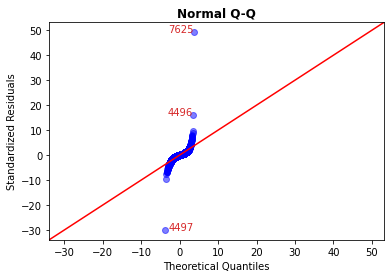

In [ ]:
cls1.qq_plot();

This plot reinforce the idea of the statistical tests performed. If the residuals follow a straight line, they are more normally distributed, and if they deviate severely they may not be so normal and there could be a pattern in your data you are missing.


**Assumption of Homoscedasticity**

For heteroscedasticity, we will use the following tests:


Breusch-Pagan test

White Test

In [14]:
import statsmodels.stats.api as sms

print('p value of Breusch–Pagan test is: ', sms.het_breuschpagan(reg.resid, reg.model.exog)[1])
print('p value of White test is: ', sms.het_white(reg.resid, reg.model.exog)[1])

p value of Breusch–Pagan test is:  5.229399285330141e-296
p value of White test is:  0.0


Assuming a significance level of 0.05, the two tests suggest that our series is heteroscedastic.

Our series is neither homoscedastic nor normally distributed. Lucky for us, unlike OLS, generalized least squares accounts for these residual errors.

**Consequences of Heteroscedasticity**

The OLS estimators and regression predictions based on them remains unbiased and consistent.
The OLS estimators are no longer the BLUE (Best Linear Unbiased Estimators) because they are no longer efficient, so the regression predictions will be inefficient too.

Because of the inconsistency of the covariance matrix of the estimated regression coefficients, the tests of hypotheses, (t-test, F-test) are no longer valid.

**How to Deal with Heteroscedastic Data**

If your data is heteroscedastic, it would be inadvisable to run regression on the data as is. There are a couple of things you can try if you need to run regression:
Give data that produces a large scatter less weight.
Transform the Y variable to achieve homoscedasticity. For example, use the Box-Cox normality plot to transform the data.


**Collinearity**

Collinearity refers to the situation in which two or more predictor variables collinearity are closely related to one another. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. It is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation **multicollinearity**.



**Variance inflation factor (VIF)**

Instead of inspecting the correlation matrix, a better way to assess multicollinearity is to compute the variance inflation factor (VIF). Note that we ignore the intercept in this test.

The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors.

As a rule of thumb, a VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.

**VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variables in the model.**
A VIF of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.A VIF of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.

In [ ]:
cls1.vif_table()

    Features  VIF Factor
0  Intercept        1.00
6     Volume        4.01
5   AdjClose      388.60
3        Low    37482.12
1       Open    40591.97
4      Close    46045.46
2       High    57530.44


Ultimately, the presence of multicollinearity results in several problems:


1.   The fitted regression coefficients (beta hat) will change substantially if one of the values of one of the x variables is changed only a bit.
2.   The variance of the estimated coefficients will be inflated, which means that it will be hard to detect statistical significance. Furthermore, it’s possible that the F statistic is significant but the individual t statistics are not.
3.   Ultimately, multicollinearity makes prediction less accurate. For a given model, the underlying assumption is that the relationships among the predicting variables, as well as their relationship with the target variable, will be the same. However, when multicollinearity is present, this is less likely to be the case.








**There is a multicollinearity problem**

# Correlation and forecasting


**Forecasting with correlated predictors**

When two or more predictors are highly correlated it is always challenging to accurately separate their individual effects. Having correlated predictors is not really a problem for forecasting, as we can still compute forecasts without needing to separate out the effects of the predictors. However, it becomes a problem with scenario forecasting as the scenarios should take account of the relationships between predictors. It is also a problem if some historical analysis of the contributions of various predictors is required.

**Multicollinearity and forecasting**

A closely related issue is multicollinearity, which occurs when similar information is provided by two or more of the predictor variables in a multiple regression. It can occur when two predictors are highly correlated with each other (that is, they have a correlation coefficient close to +1 or -1). In this case, knowing the value of one of the variables tells you a lot about the value of the other variable. Hence, they are providing similar information. For example, foot size can be used to predict height, but including the size of both left and right feet in the same model is not going to make the forecasts any better, although it won’t make them worse either.

Multicollinearity can also occur when a linear combination of predictors is highly correlated with another linear combination of predictors. In this case, knowing the value of the first group of predictors tells you a lot about the value of the second group of predictors. Hence, they are providing similar information.

An example of this problem is the dummy variable trap discussed in Section 5.4. Suppose you have quarterly data and use four dummy variables, d1, d2, d3 and d4. Then d4=1−d1−d2−d3, so there is perfect correlation between d4 and d1+d2+d3.
In the case of perfect correlation (i.e., a correlation of +1 or -1, such as in the dummy variable trap), it is not possible to estimate the regression model.
If there is high correlation (close to but not equal to +1 or -1), then the estimation of the regression coefficients is computationally difficult. In fact, some software (notably Microsoft Excel) may give highly inaccurate estimates of the coefficients. Most reputable statistical software will use algorithms to limit the effect of multicollinearity on the coefficient estimates, but you do need to be careful. The major software packages such as R, SPSS, SAS and Stata all use estimation algorithms to avoid the problem as much as possible.

When multicollinearity is present, the uncertainty associated with individual regression coefficients will be large. This is because they are difficult to estimate. Consequently, statistical tests (e.g., t-tests) on regression coefficients are unreliable. (In forecasting we are rarely interested in such tests. Also, it will not be possible to make accurate statements about the contribution of each separate predictor to the forecast.
**Forecasts will be unreliable if the values of the future predictors are outside the range of the historical values of the predictors**. For example, suppose you have fitted a regression model with predictors x1 and x2 which are highly correlated with each other, and suppose that the values of x1 in the fitting data ranged between 0 and 100. Then forecasts based on x1>100 or 0>x1 will be unreliable. **It is always a little dangerous when future values of the predictors lie much outside the historical range, but it is especially problematic when multicollinearity is present**.

if you are not interested in the specific contributions of each predictor, and if the future values of your predictor variables are within their historical ranges, there is nothing to worry about — multicollinearity is not a problem except when there is perfect correlation.

